# __**Laboratorio 3: conv lineal, DFT.N  y conv circular.N, inicios de STFT**__
Convolución lineal discreta

Transformada de Fourier Discreta (DFT) punto N

Convolución circular punto N


### **Librerías necesarias**

instalamos la librerías y sublibrerías necesarias para toda la notebook

In [4]:
import numpy as np 
#import math
import matplotlib.pyplot as plt 
from scipy import signal #para convolución lineal
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier

## **Ejercicio 1**

**1) Dadas las señales periódicas $x$ y $z$ definidas para $t \in R $, tiempo medido en segundos**

$$x(t)=sen(2\pi t)$$
$$z(t)=cos(14\pi t)$$ 

**a) Calcule el período de cada una y su frecuencia (ayuda: $x$ oscila 1 vez con $t$ entre 0 y $1$)**



período $P=L/k$, donde $L$ es la longitud del intervalo donde se cuentan la cantidad de oscilaciones (k), 

y la Frecuencia $f= k/L= 1/P$

Para $x$:  El período es $P=L/k=1/1=1$ segundo, y la frecuencia 1 Hz.
    
Para $z$: El periodo es $P=L/k=1/7$ segundo y la frecuencia es $7[Hz]$

**b) Muestree las señales $x$ e $y$, con $t \in [0,5)$, con $100$ muestras equiespaciadas por segundo. Calcule la cantidad de muestras necesaria, la frecuencia y período de muestreo.**

In [5]:
Pm=1/100 #período de muestreo, paso o períodod entre muestra y muestra
# 5 segundos * 100 muestras/segundo = 500 muestras
tn=np.arange(0,5,Pm)
x=np.sin(2*np.pi*tn)
#completar

z=np.cos(2*7*np.pi*tn)

**c) grafique usando subplot las señales discretas resultado del muestreo**

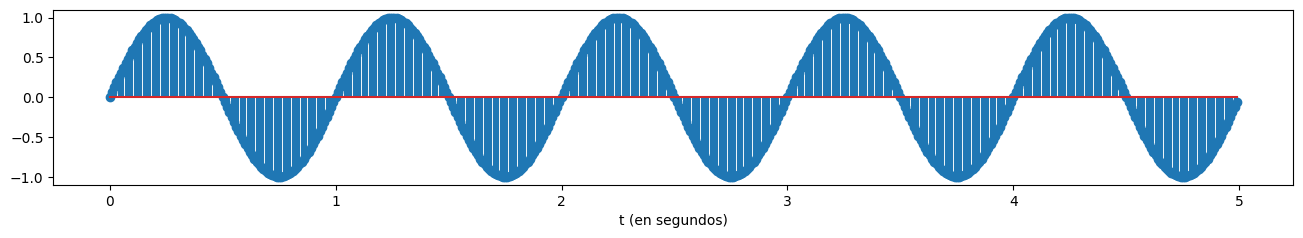

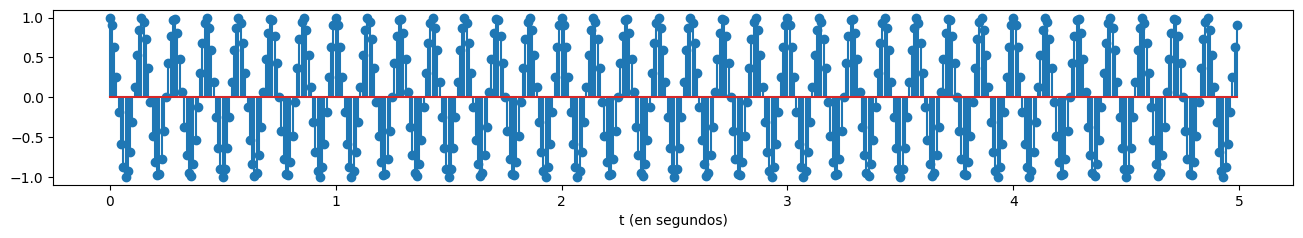

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(211)
#plt.plot(tn,x, color='blue', label='Señal x(t)')
plt.stem(tn,x, label='Senal x(t)')
#plt.legend(loc='upper right')
plt.xlabel('t (en segundos)')
#completar

plt.figure(figsize=(16,5))
plt.subplot(212)
plt.stem(tn, z, label='Senal z')
plt.xlabel('t (en segundos)')
plt.show()

### d) conv lineal
Calcular y= x*z la convolución lineal discreta de las señales muestreadas x y z. Graficar y calcular la longitud del resultado, verificar. 

Longitudes de vectores:  999 500 500


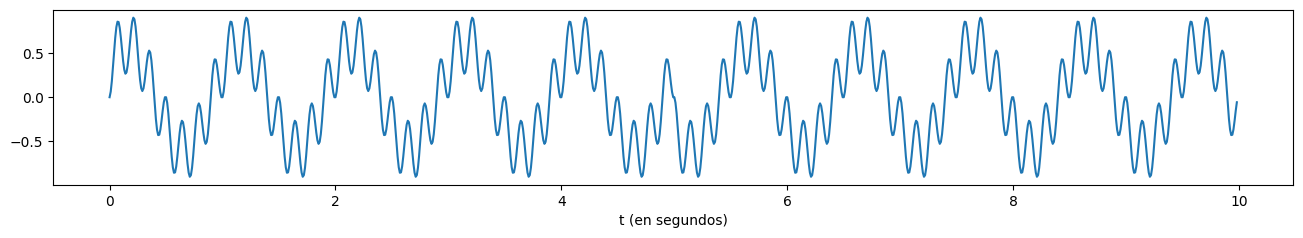

In [7]:
ty = np.arange(0, 9.99, Pm)
y=signal.convolve(x,z)

print('Longitudes de vectores: ',len(y), len(x), len(z))

plt.figure(figsize=(16,5))
plt.subplot(212)
plt.plot(ty, y, label='Senal y de convolucion')
plt.xlabel('t (en segundos)')
plt.show()

## **Ejercicio 2**
Genere y grafique las siguientes funciones/señales discretas:


$x_3[n]=3 + 5\cos\left(4n\frac{\pi}{100}\right) + \cos\left(50 n \frac{\pi}{100}\right)$,  para $n=0, \dots, 99$ 

$x_4[n]=1/5$ , para  $n=0,\dots, 4$.


In [8]:
#completar
n=np.arange(100)
x3= 3+5*np.cos(4*np.pi*n/100)+np.cos(50*n*np.pi/100)  #completar

x4 = np.ones(5); # funcion ones genera un vector de 1s de la longitud n que le pase como parametros
x4 = x4*(1/5);

print(x4)

[0.2 0.2 0.2 0.2 0.2]


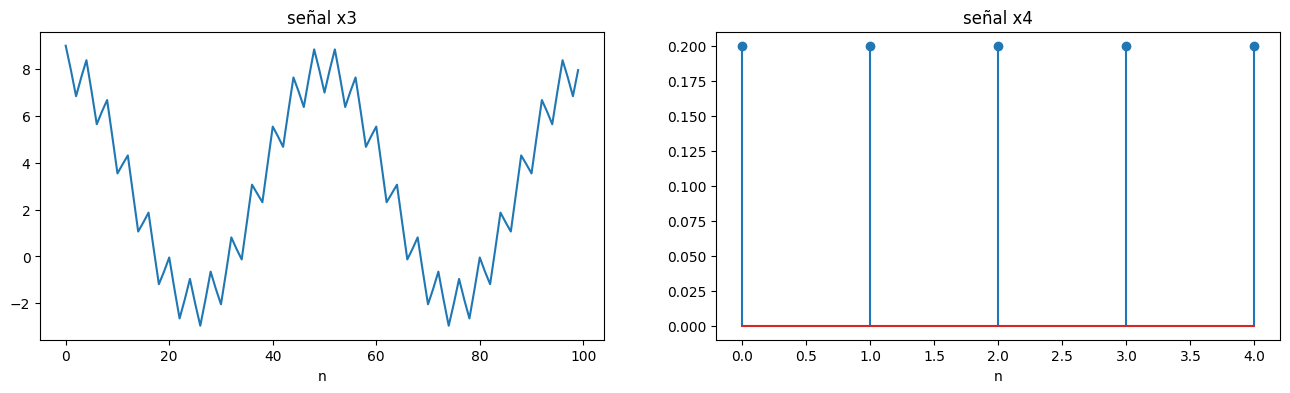

In [9]:
plt.figure(figsize=(16,4))
#completar
plt.subplot(121)

plt.plot(x3)
plt.xlabel('n')
plt.title('señal x3')

plt.subplot(122)
plt.stem(x4)
plt.xlabel('n')
plt.title('señal x4')
plt.show()

### b) conv lineal
Calcule su producto de convolución (discreta lineal) y grafique, verifique longitud y analice el gráfico

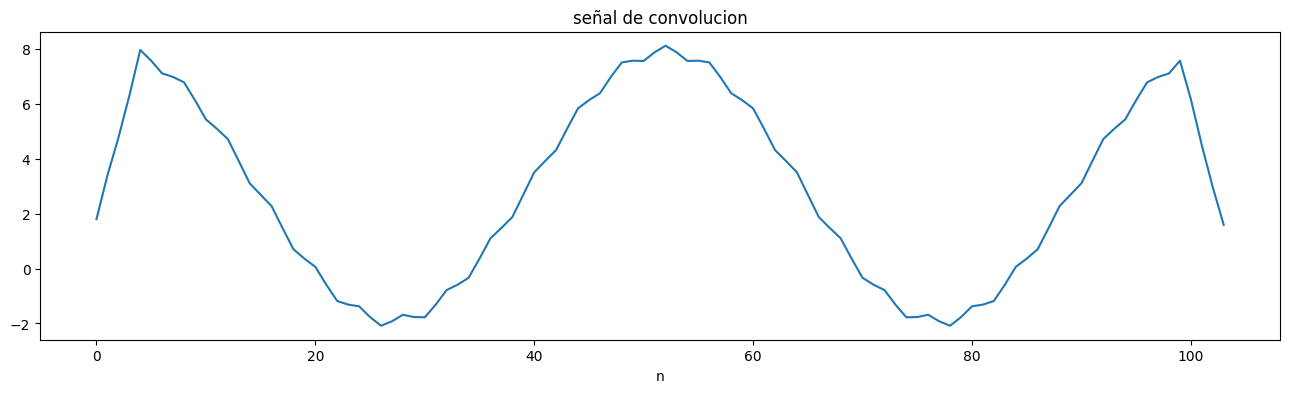

In [10]:
# longitud de la convolucion es 104 -> 100+5-1
ty = np.arange(0,104, 1)
y = signal.convolve(x3,x4)

plt.figure(figsize=(16,4))
plt.plot(ty,y)
plt.xlabel('n')
plt.title('señal de convolucion')
plt.show()

**Atención!** notar el efecto de suavizado... $x_4$ actúa como un filtro de promediado, suavizado (pasa bajo), $x_4$ suaviza a la señal $x_3$. En breve veremos que les pasa a las Transformadas de Fourier de estas señales

## Ejercicio 3: DFT.N
Calcule la transformada de Fourier punto N=100 de la señal x3. Dado que es una señal con valores complejos, grafique la parte real y la imaginaria por separado. 

In [11]:
N=100
TFx3=fft(x3,N)

In [12]:
print(len(TFx3)) #longitud de la transformada
print(TFx3[0:4]) #imprimimos los 4 primeros lugares de la señal (compleja )

100
[ 3.00000000e+02-0.00000000e+00j -1.92787451e-14-4.10635869e-14j
  2.50000000e+02-9.41095789e-14j  7.48790870e-14-4.09884940e-15j]


C:\Users\diezf\AppData\Local\Temp\ipykernel_22060\853736094.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(311)


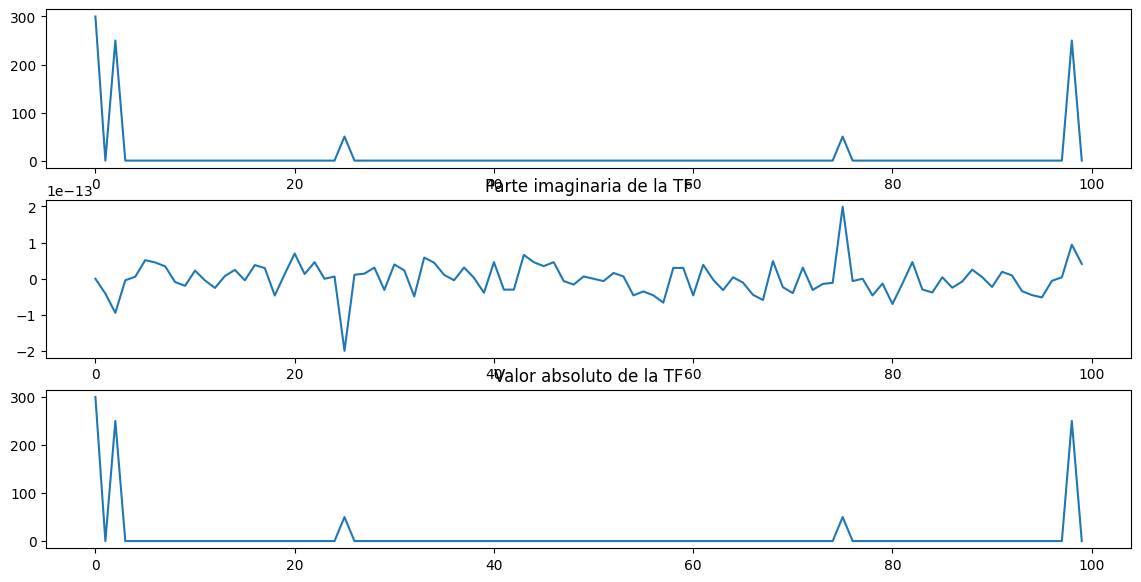

In [13]:
plt.figure(figsize=(14,7))
plt.title("Parte real de la TF")
plt.subplot(311)
plt.plot(np.real(TFx3))

plt.subplot(312)
plt.title("Parte imaginaria de la TF")
plt.plot(np.imag(TFx3))

plt.subplot(313)
plt.title("Valor absoluto de la TF")
plt.plot(abs(TFx3))
#completar, agregar títulos... 
plt.show()

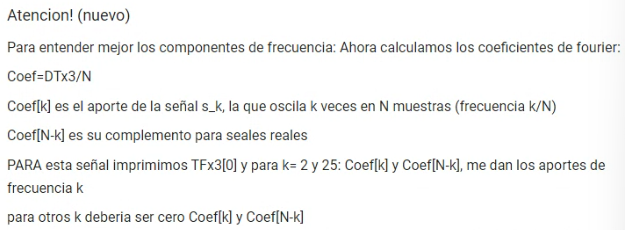

In [14]:
Coef = TFx3/N # los coeficientes son el peso que tiene en frecuencia cada senal
print(abs(Coef[0])) # en cero tenemos la constante (el componente de frecuencia 0 de la senal)

k = 12;
print(abs(Coef[N-k]))

3.0
3.872752146252442e-16


### b) 
A partir del resultado, puede recuperar la señal x3 nuevamente? compruebe

Se recupera la senal aplicando la transformada inversa

C:\Users\diezf\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


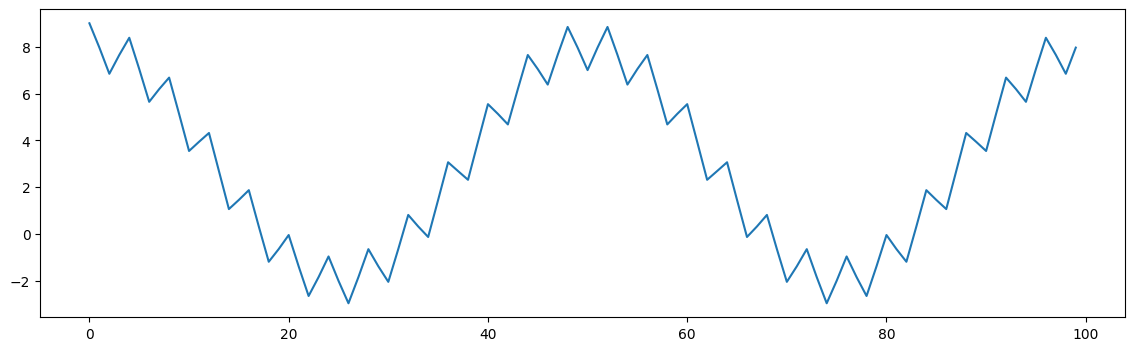

In [15]:
recuperada = ifft(TFx3);
plt.figure(figsize=(14,4))
plt.plot(recuperada)

### c) 
calcula la DFT.N (Transformada de Fourier Discreta punto N) con N=100 de x4. 

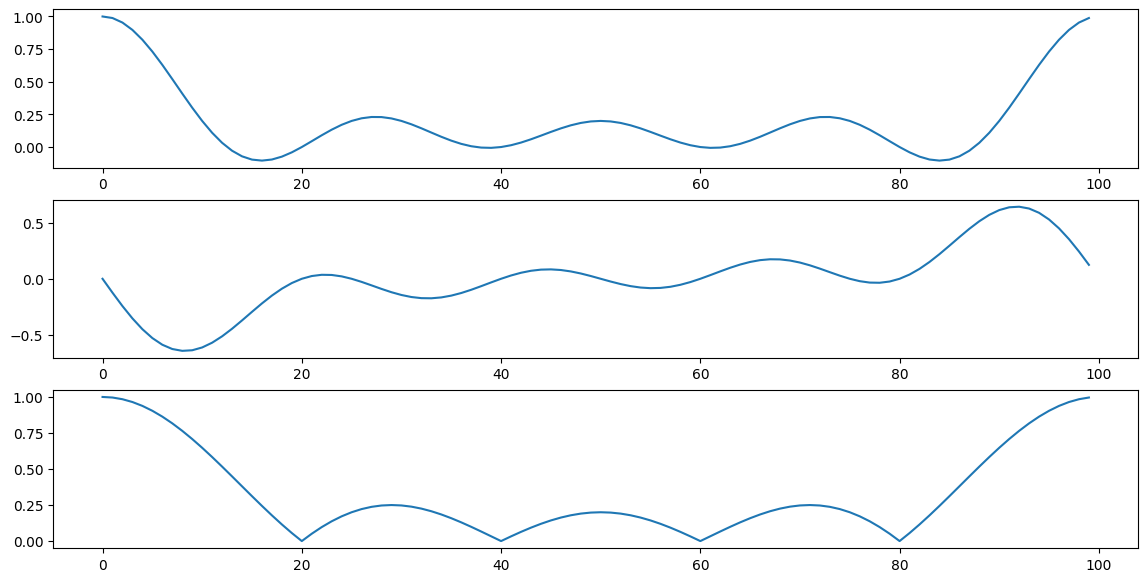

In [16]:
N = 100
TFx4 = fft(x4, N)

plt.figure(figsize=(14,7))
plt.subplot(311)
plt.plot(np.real(TFx4))

plt.subplot(312)
plt.plot(np.imag(TFx4))

plt.subplot(313)
plt.plot(abs(TFx4))
#completar, agregar títulos... 
plt.show()

### d)
Se puede recuperar x4 con el resultado? se ha realizado un Zero padding o un truncamiento?

C:\Users\diezf\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:3371: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<StemContainer object of 3 artists>

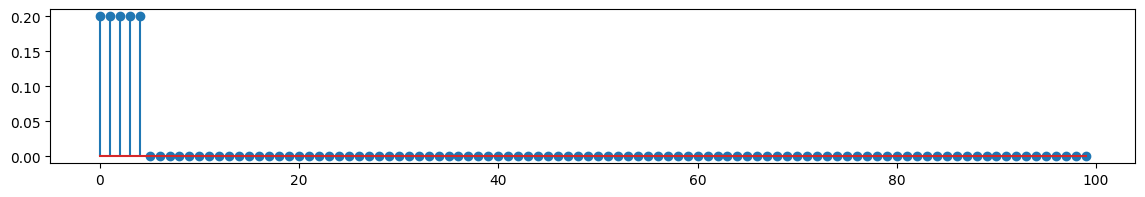

In [17]:
inverse = ifft(TFx4, N)

plt.figure(figsize=(14,2))
plt.stem(inverse)

# se recupera un zero padding -> porque se agregan ceros al vector
# N < nro. de muestras => truncamiento
# caso contrario => zero padding

 ⚠️ Nota >> aca ocurre un zero padding porque el vector rellena con ceros

## Ejercicio 4: conv lineal y DFT.N
Calcular la transformada de Fourier de la convolución lineal de x3 y x4. Coincide con el producto de las transformadas? bajo que condiciones?

## Teorema de la convolucion
| Dominio del tiempo         | Dominio de la frecuencia     |
|--------------|-----------|
| $x_1(t)\cdot x_2(t)$ | $X_1(\omega t)* X_2(\omega t)$      |
| $x_1(t)* x_2(t)$ | $X_1(\omega t)\cdot X_2(\omega t)$      |

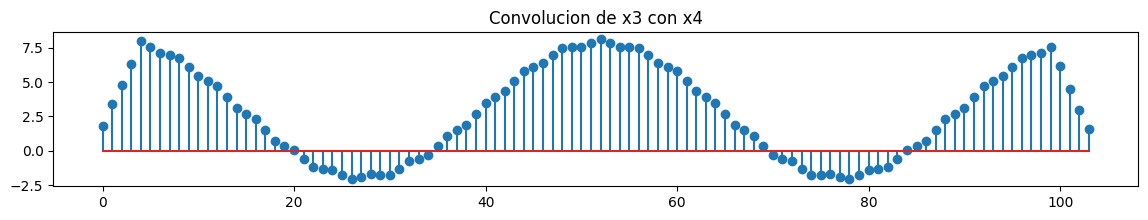

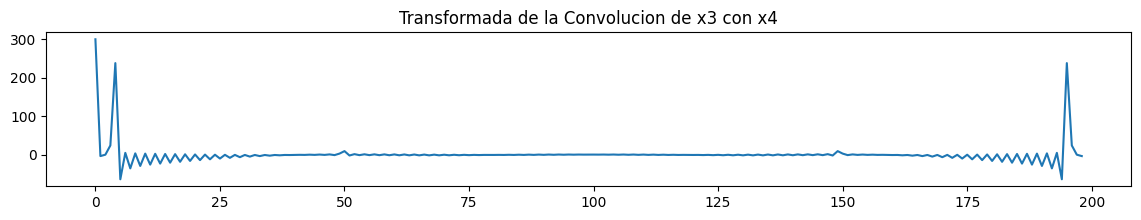

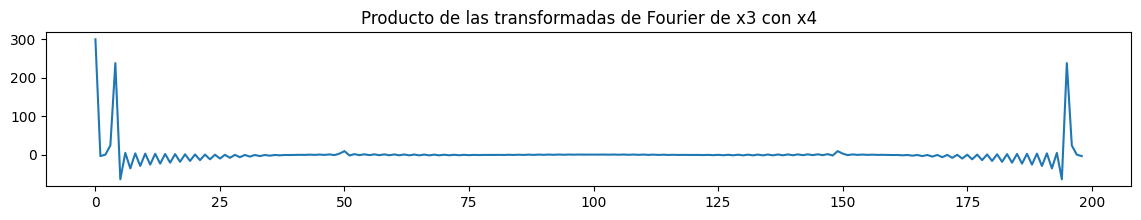

In [18]:
N = len(TFx3)+len(TFx4)-1

TFx3 = fft(x3, N)
TFx4 = fft(x4, N)

h = signal.convolve(x3,x4)
plt.figure(figsize=(14,2))
plt.title("Convolucion de x3 con x4")
plt.stem(h)

FTh = fft(h, N)

plt.figure(figsize=(14,2))
plt.title("Transformada de la Convolucion de x3 con x4")
plt.plot(FTh)


# verifico teorema de la convolucion
#   la TF de fourier de la convolucion deberia ser lo mismo que el producto de las transformadas
check = TFx3 * TFx4
plt.figure(figsize=(14,2))
plt.title("Producto de las transformadas de Fourier de x3 con x4")
plt.plot(check)

plt.show()

Coincide el producto de las transformadas? 
El teorema de la conv. vale para la conv. circular. 
**La transformada de la convolucion circular punto N es igual al producto de las transformadas punto N**
Para que la convolucion circular punto N coincida con la lineal, N debe ser igual o mas grande que len(x3)+len(x4)-1

## **Ejercicio 5: DFT.N y conv circular**
Calcular la convolución circular punto N=100 de x3 y x4. Verificar el teorema de la convolución (el producto de las trasformadas es la transformada de la convolución)

#### función conv_circ_N
Función que calcula la convolución circular de dos vectores punto N

In [19]:
#Convolución circular de N puntos de las señales f y g
#de forma "manual",  definiendo la funcion:
import numpy as np

def conv_circ_N(f,g, N):
  N=int(N)
  f1=np.zeros(N)
  g1=np.zeros(N)
  h=np.zeros(N)
  Mf=len(f)
  if Mf<= N: f1[0:Mf]=f 
  else:   f1=f[0:N]
  Mg=len(g) 
  if Mg<= N: g1[0:Mg]=g 
  else:   g1=g[0:N]  
  for m in range(N):
    for n in range(N):
      h[m] += f1[n]*g1[m - n]   # sumatoria 
  return h                 

longitudes: 100 5 100


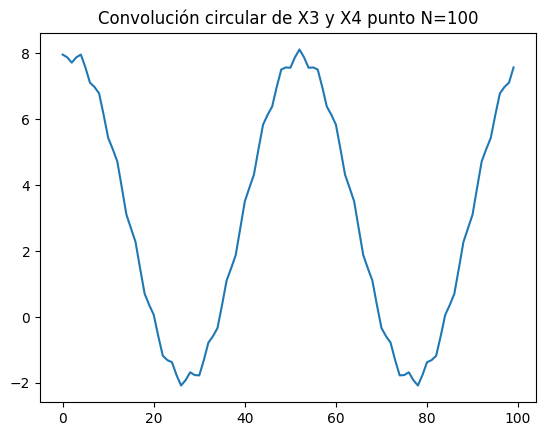

In [20]:
N=100
#Realizar la convolución circular punto N de estas dos señales y graficar
x34c= conv_circ_N(x3,x4,N)
print("longitudes:", len(x3), len(x4), len(x34c))

plt.plot(x34c)
plt.title('Convolución circular de X3 y X4 punto N=100')
plt.show()

In [21]:
TFx3=fft(x3,N)
TFx4=fft(x4,N)
TFx34c=fft(x34c,N)

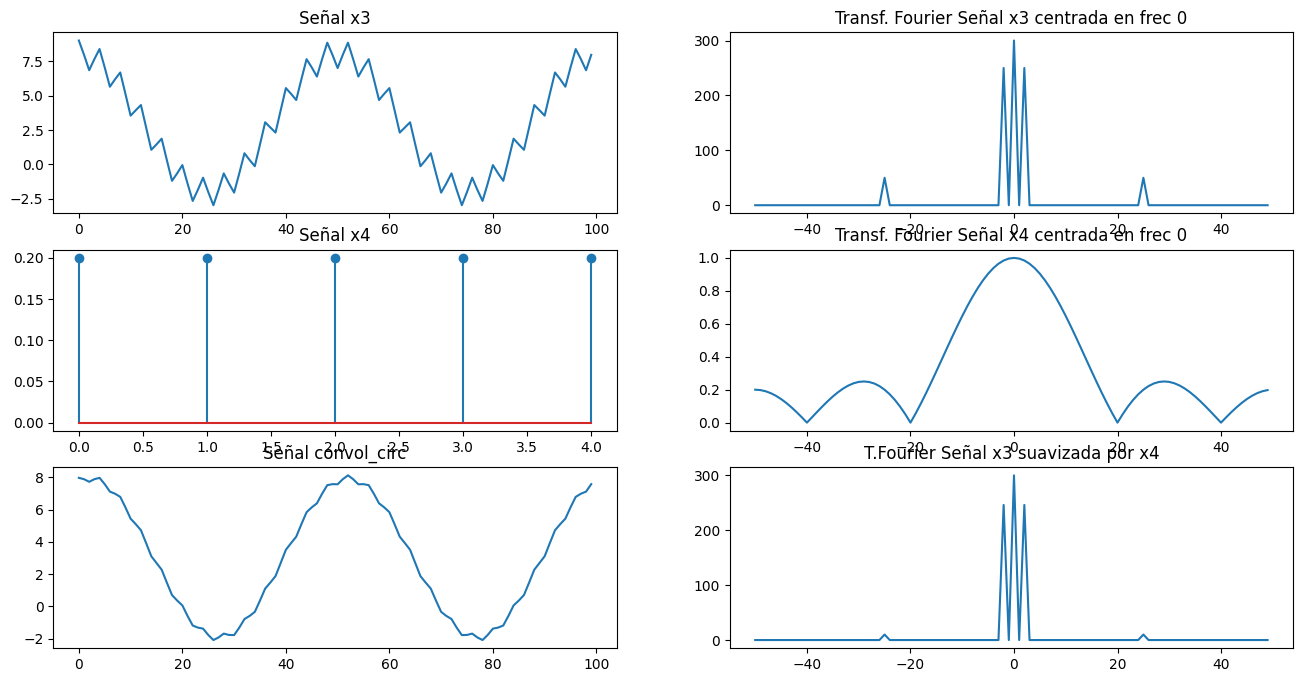

In [42]:
ncentrado = np.arange(-50,50) # hago esto para arreglar el eje y que me quede centrado el eje de las ordenadas

plt.figure(figsize=(16,8))
plt.subplot(321)
plt.plot(x3)
plt.title('Señal x3')
plt.subplot(322)
plt.plot(ncentrado, fftshift(abs(TFx3)))
plt.title('Transf. Fourier Señal x3 centrada en frec 0')

plt.subplot(323)
plt.stem(x4)
plt.title('Señal x4')
plt.subplot(324)
plt.plot(ncentrado, fftshift(abs(TFx4)))
plt.title('Transf. Fourier Señal x4 centrada en frec 0') # fftshift() es para centrar en freq. 0

plt.subplot(325)
plt.plot(x34c)
plt.title('Señal convol_circ')
plt.subplot(326)
plt.plot(ncentrado, fftshift(abs(TFx34c)))
plt.title('T.Fourier Señal x3 suavizada por x4')
plt.show()

x4 resulta un filtro pasa bajos (no ideal)

# Bonus: Frecuencia y sonido

[Link Frecuencias y sonidos](https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb#scrollTo=oI_G5zEXPLWr)
Gentileza de la Colo Bertello

No ejecuten las celdas, sólo el play del cada sonido:

## Ejercicio 6 (inicios STFT)

Dadas las señales discretas 

$x_1\left[n\right]= 2\cos\left(18*2\pi\frac{ n}{256}\right)   \text{ para  } n= 0,..,255$

$x_2\left[n\right]= 5\cos\left(15*2\pi \frac{n}{256}\right)   \text{ para  } n= 0,..,255$


* Construya la señal suma    
$s=x_1+x_2$
* Construya la señal concatenada adosada $c=[x_1 \ , x_2]$ es decir: 


$c\left[n\right]=\left\{\begin{matrix}
 x_1\left[n\right] & \text{ si }   n= 0,..,255;\\     
                   x_2\left[n-256\right]   & \text{ si }  n= 256,..,511
\end{matrix}\right.$


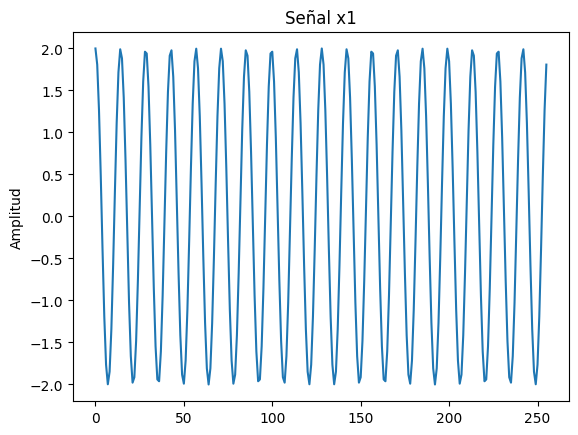

In [43]:
#Vamos a definir dos señales x1 y x2 
#Defino función x1[n] donde n = 0:255, cuya amplitud es 2 
#la cantidad de oscilaciones en 255 muestras es 18

n = np.arange(0,256)
x1 = 2*np.cos(36*np.pi*n/256)

plt.plot(x1)
plt.title('Señal x1')
plt.ylabel('Amplitud')
plt.show()

float64


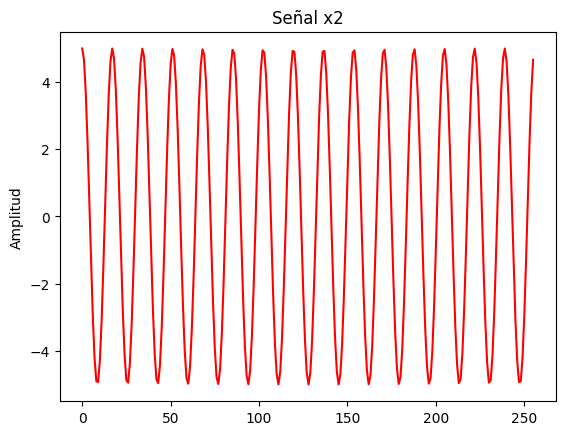

In [48]:
#Defino señal x2[n] donde n2 = 0:255 , cuya amplitud es 5
#la cantidad de oscilaciones en 256 muestras es 5, ya que cant. Os * 2pi/256 = 10pi/256
x2 = 5*np.cos(15*2*np.pi*n/256)
print(x2.dtype)

plt.plot(x2, color='red')
plt.title('Señal x2')
plt.ylabel('Amplitud')
plt.show()

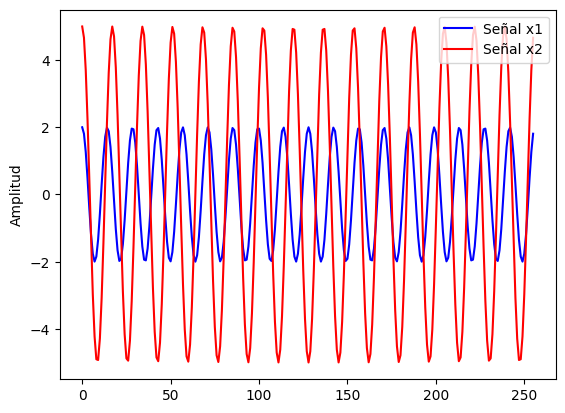

In [49]:
#Podemos mostrarlas en el mismo gráfico
plt.plot(x1, color='blue',label='Señal x1')
plt.plot(x2, color='red',label='Señal x2')
plt.legend(loc='upper right')
plt.ylabel('Amplitud')
plt.show()

Text(0, 0.5, 'Amplitud')

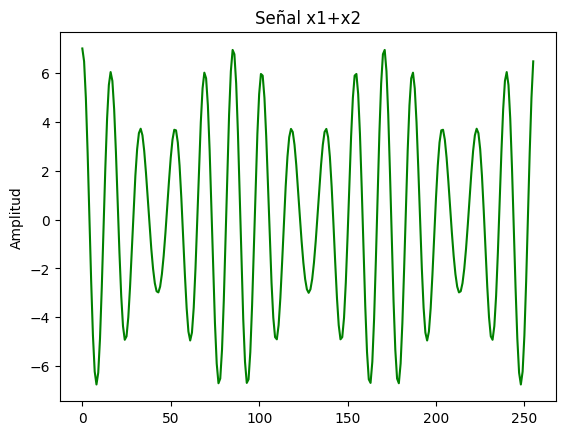

In [50]:
#Como tienen la misma longitud podemos calcular la suma
s = x1 + x2
plt.plot(s, color='green')
plt.title('Señal x1+x2')
plt.ylabel('Amplitud')

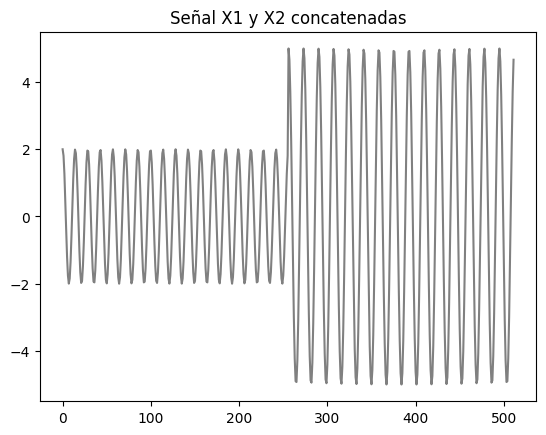

In [51]:
#Señales concatenadas
c = np.concatenate((x1,x2))
plt.plot(c, color='gray')
plt.title('Señal X1 y X2 concatenadas')
plt.show()


### b) DFT. 512

Grafique la transformada de Fourier punto $N = 512$ de ambas y compárelas



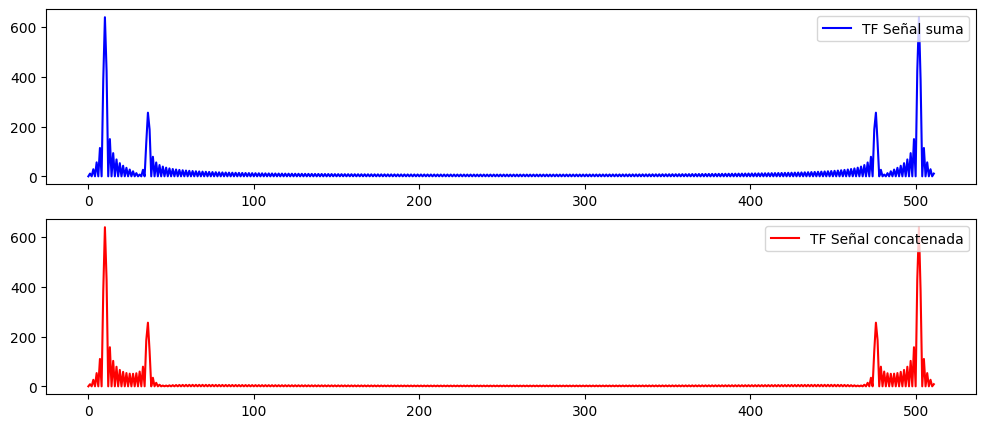

In [28]:
#Calculamos la transformada de fourier punto N=512 de ambas señales (suma y concatenada)
TF1 = fft(s,512)  #transfomada punto N=512 de la suma
TF2 = fft(c,512)  #transfomada punto N=512 de la concatenada

#Graficamos el valor absoluto de las transformadas de Fourier 
#de ambas funciones s y c para analizarlas según sus componentes de frecuencia

plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(abs(TF1), color='blue', label='TF Señal suma')
plt.legend(loc='upper right')

plt.subplot(212)
plt.plot(abs(TF2), color='red', label='TF Señal concatenada')
plt.legend(loc='upper right')
plt.show()

In [29]:
#hacemos el zero padding de la señal suma (manualmente)
s_0p = np.zeros(512)
s_0p[0:256]=s;
#luego:S= fft(s,512) es equivalente a S= fft(s_0p,512);

### c) STFT
Analice los componentes de frecuencia de los primeros 128 lugares de ambas señales
(utilizando la Transfomada de Fourier). Grafique

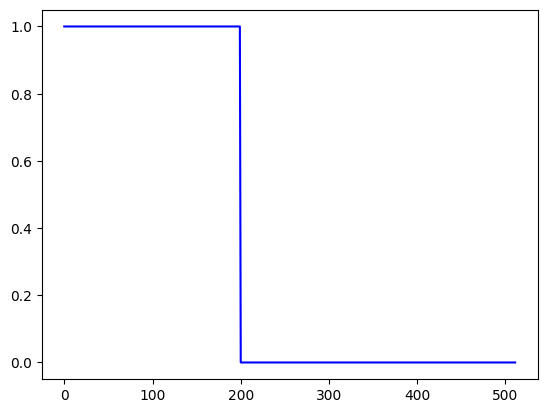

In [30]:
#Analizamos las componentes de frecuencia de los primeros 200 lugares.
#Generamos vector (ventana rectangular) que vale 1 en los primeros 200 lugares y cero fuera

rect = np.zeros(512)
rect[0:200]= 1 #elijo los lugares

plt.plot(rect, color='blue')
plt.show()

In [31]:
#Ahora multiplicamos rect (lugar a lugar) por suma y concatenada. y luego calculamos la DFT  (Trasnformada de fourier a tiempo corto - STFT))
#cuidado con la longitud de s, hay que hacer el zero padding (s_0p)

TStrunc = fft(s_0p*rect) #punto N= 512
TCtrunc = fft(c*rect) #punto N= 512


Text(0.5, 1.0, 'DFT de las primeras muestras de señal concatenada')

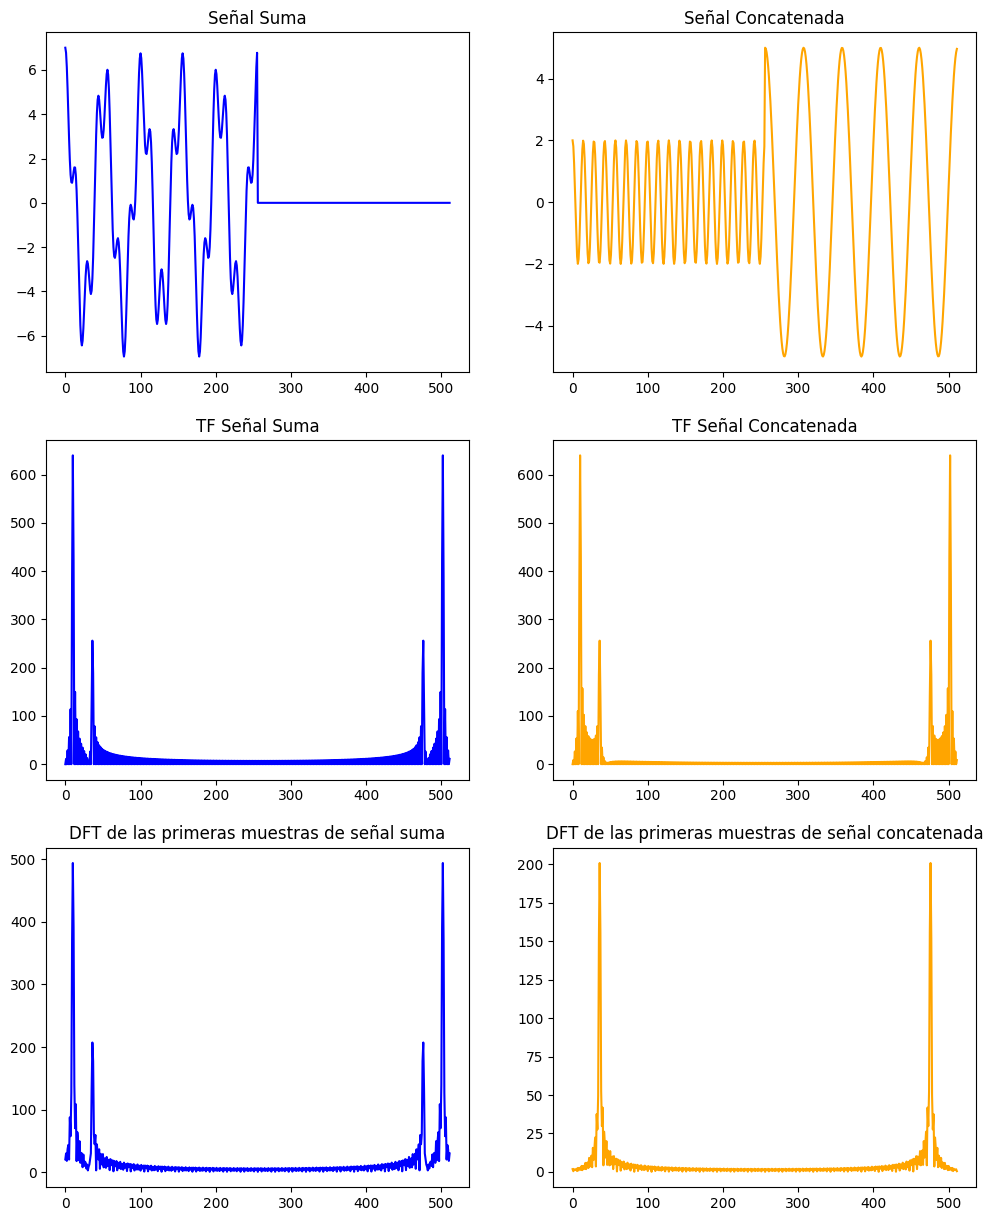

In [32]:
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.plot(s_0p, color='blue')
plt.title('Señal Suma')

plt.subplot(322)
plt.plot(c, color='orange')
plt.title('Señal Concatenada')


plt.subplot(323)
plt.plot(abs(TF1), color='blue')
plt.title('TF Señal Suma')

plt.subplot(324)
plt.plot(abs(TF2), color='orange')
plt.title('TF Señal Concatenada')

plt.subplot(325)
plt.plot( abs(TStrunc), color='blue')
plt.title('DFT de las primeras muestras de señal suma')

plt.subplot(326)
plt.plot(abs(TCtrunc), color='orange')
plt.title('DFT de las primeras muestras de señal concatenada')

Text(0.5, 1.0, 'DFT local de concatenada, centrada en frec bajas')

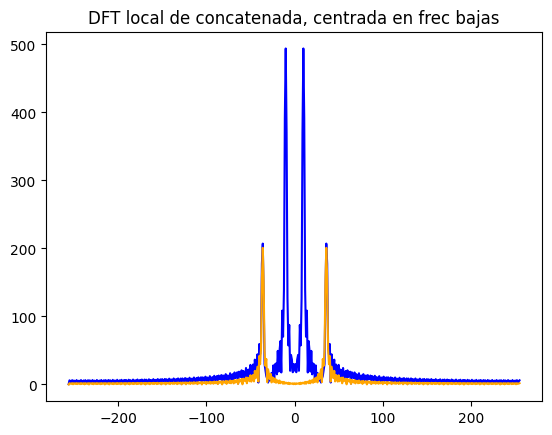

In [33]:
vv = np.arange(-256,256)

plt.plot(vv, fftshift(abs(TStrunc)), color='blue')
plt.title('DFT local de suma, centrada en frec bajas')
plt.plot(vv, fftshift(abs(TCtrunc)), color='orange')
plt.title('DFT local de concatenada, centrada en frec bajas')